In [21]:
!pip install pandas matplotlib seaborn openpyxl


In [22]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Updated_Top_30_QSR_Brands_India.xlsx'
data = pd.read_excel('Top_30_QSR_Brands_India.xlsx')

# Data Cleaning
data['Number of Outlets'] = data['Number of Outlets (2023/2024)'].str.replace(r'\D', '', regex=True).astype(float)
data['Revenue (INR Cr)'] = data['Revenue (in INR, FY23/24)'].str.replace(r'\D', '', regex=True).astype(float)
data['Market Share (%)'] = data['Market Share (QSR Segment)'].str.replace('%', '').astype(float)
data['Growth Rate (%)'] = data['Growth Rate (2023/24)'].str.replace('%', '').astype(float)
data['Customer Satisfaction Score'] = data['Customer Satisfaction Score (2023)'].str.replace('/5', '').astype(float)
data['Delivery Efficiency (%)'] = data['Delivery Efficiency Score (2023)'].str.replace('%', '').astype(float)


In [23]:
# Drop original columns with inconsistent data
data = data.drop(columns=[
    'Number of Outlets (2023/2024)',
    'Revenue (in INR, FY23/24)',
    'Market Share (QSR Segment)',
    'Growth Rate (2023/24)',
    'Customer Satisfaction Score (2023)',
    'Delivery Efficiency Score (2023)'
])

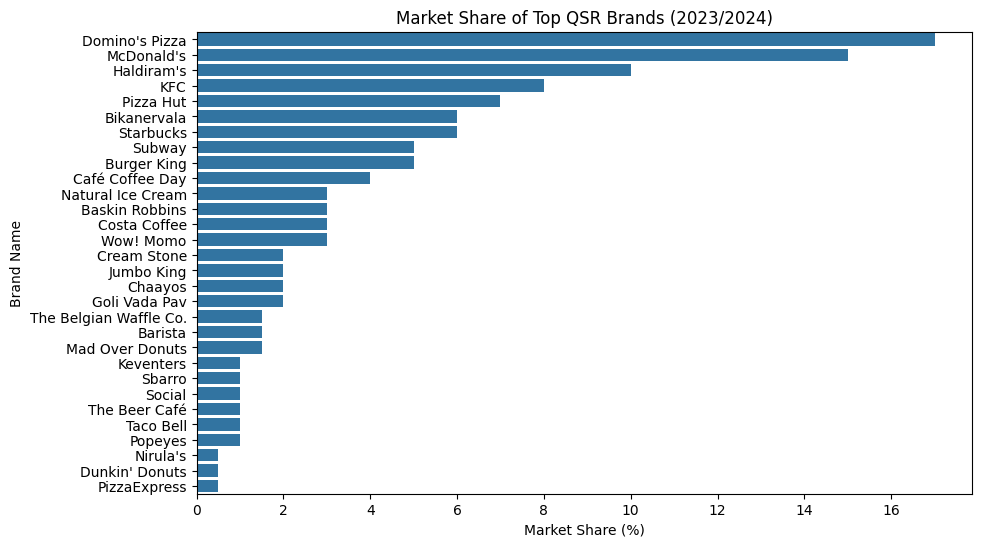

In [24]:
# Market Share Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Market Share (%)', y='Brand Name', data=data.sort_values(by='Market Share (%)', ascending=False))
plt.title('Market Share of Top QSR Brands (2023/2024)')
plt.xlabel('Market Share (%)')
plt.ylabel('Brand Name')
plt.show()

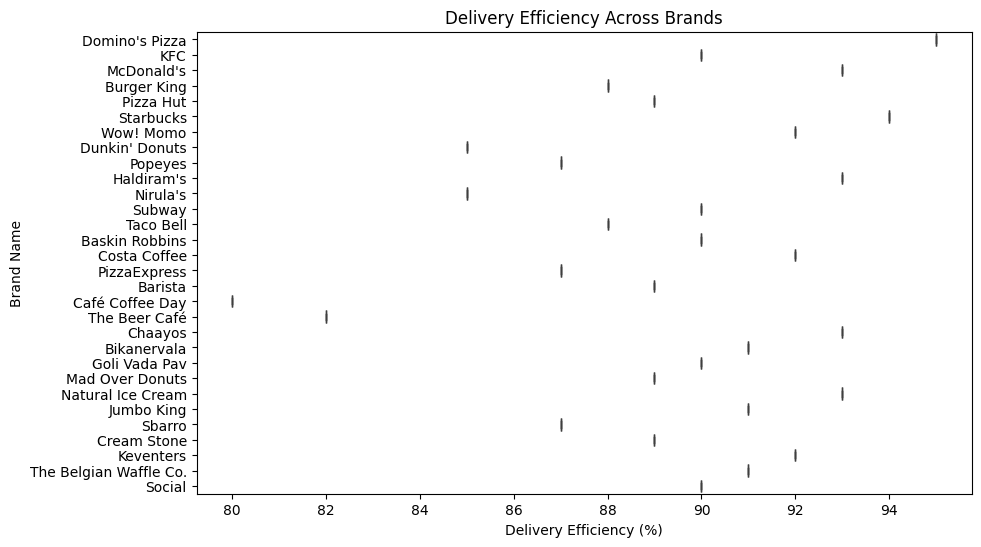

In [25]:
# Delivery Efficiency Comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='Delivery Efficiency (%)', y='Brand Name', data=data)
plt.title('Delivery Efficiency Across Brands')
plt.xlabel('Delivery Efficiency (%)')
plt.ylabel('Brand Name')
plt.show()

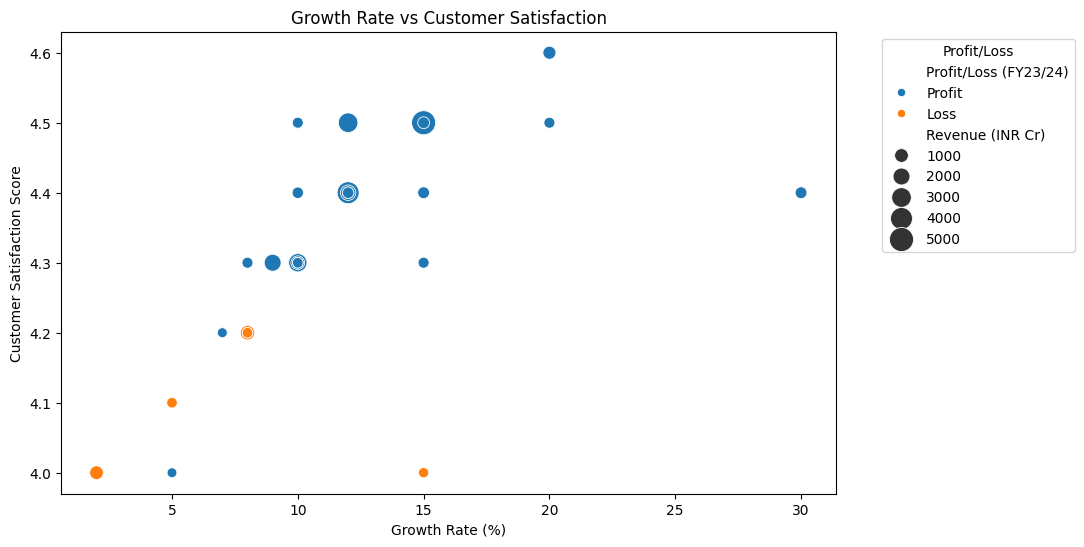

In [26]:
# Growth Rate vs Customer Satisfaction
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Growth Rate (%)', y='Customer Satisfaction Score', size='Revenue (INR Cr)', hue='Profit/Loss (FY23/24)', data=data, sizes=(50, 300))
plt.title('Growth Rate vs Customer Satisfaction')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Customer Satisfaction Score')
plt.legend(title='Profit/Loss', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Revenue Efficiency
Calculate how efficiently each brand converts outlets into revenue. Are there brands with fewer outlets making more money?**

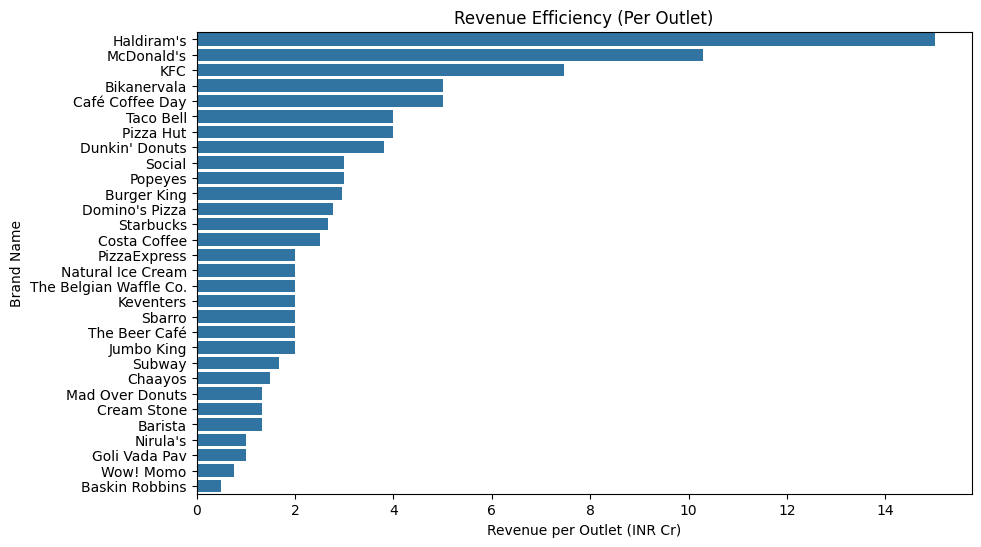

In [27]:
# Revenue Efficiency = Revenue per Outlet
data['Revenue per Outlet (INR Cr)'] = data['Revenue (INR Cr)'] / data['Number of Outlets']

# Plot Revenue per Outlet
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Revenue per Outlet (INR Cr)',
    y='Brand Name',
    data=data.sort_values(by='Revenue per Outlet (INR Cr)', ascending=False)
)
plt.title('Revenue Efficiency (Per Outlet)')
plt.xlabel('Revenue per Outlet (INR Cr)')
plt.ylabel('Brand Name')
plt.show()


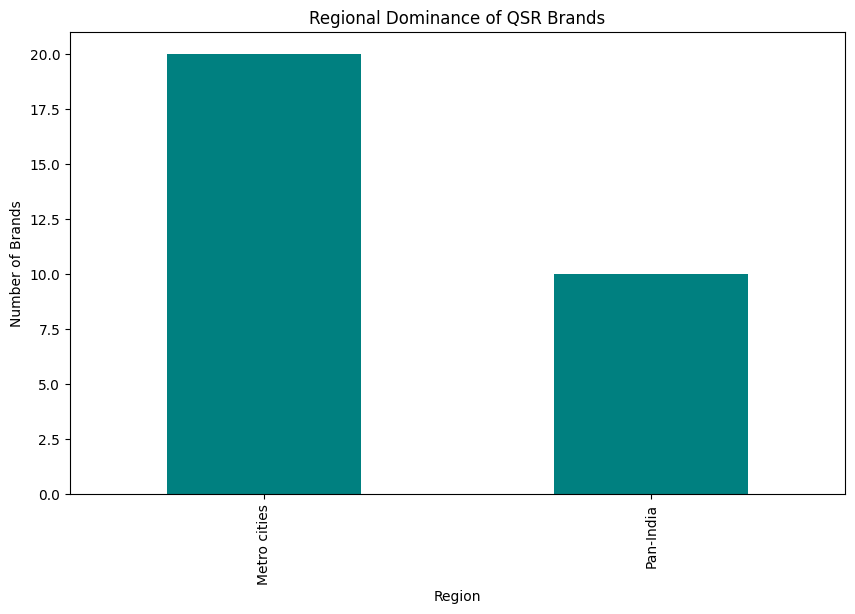

In [28]:
# Count brands operating in key markets
key_markets = data['Key Markets'].str.split(', ').explode().value_counts()

# Plot Regional Dominance
plt.figure(figsize=(10, 6))
key_markets.plot(kind='bar', color='teal')
plt.title('Regional Dominance of QSR Brands')
plt.xlabel('Region')
plt.ylabel('Number of Brands')
plt.show()


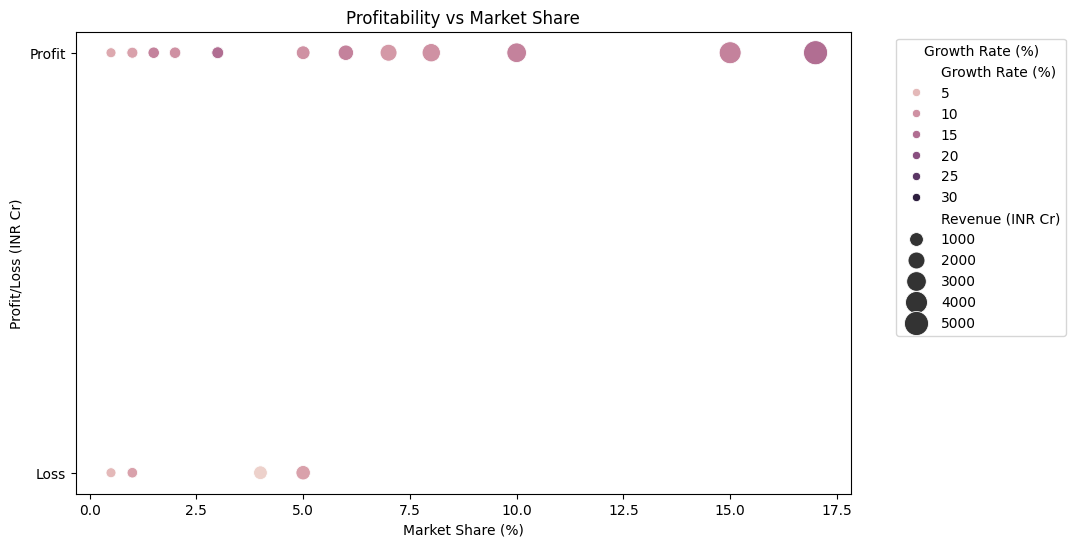

In [29]:
# Profitability vs Market Share
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Market Share (%)',
    y='Profit/Loss (FY23/24)',
    size='Revenue (INR Cr)',
    hue='Growth Rate (%)',
    data=data, sizes=(50, 300)
)
plt.title('Profitability vs Market Share')
plt.xlabel('Market Share (%)')
plt.ylabel('Profit/Loss (INR Cr)')
plt.legend(title='Growth Rate (%)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


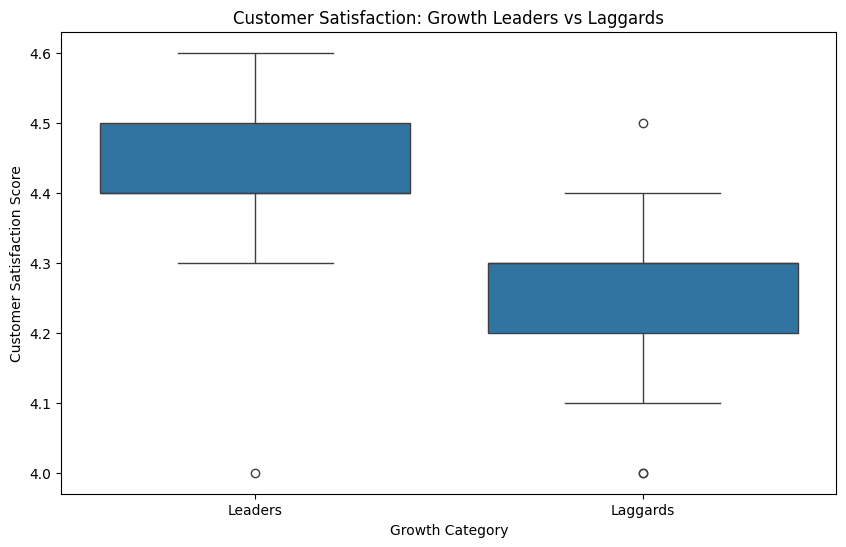

In [30]:
# Determine the median growth rate
median_growth = data['Growth Rate (%)'].median()

# Add a 'Growth Category' column
data['Growth Category'] = data['Growth Rate (%)'].apply(
    lambda x: 'Leaders' if x > median_growth else 'Laggards'
)

# Boxplot for Customer Satisfaction
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Growth Category',
    y='Customer Satisfaction Score',
    data=data
)
plt.title('Customer Satisfaction: Growth Leaders vs Laggards')
plt.xlabel('Growth Category')
plt.ylabel('Customer Satisfaction Score')
plt.show()


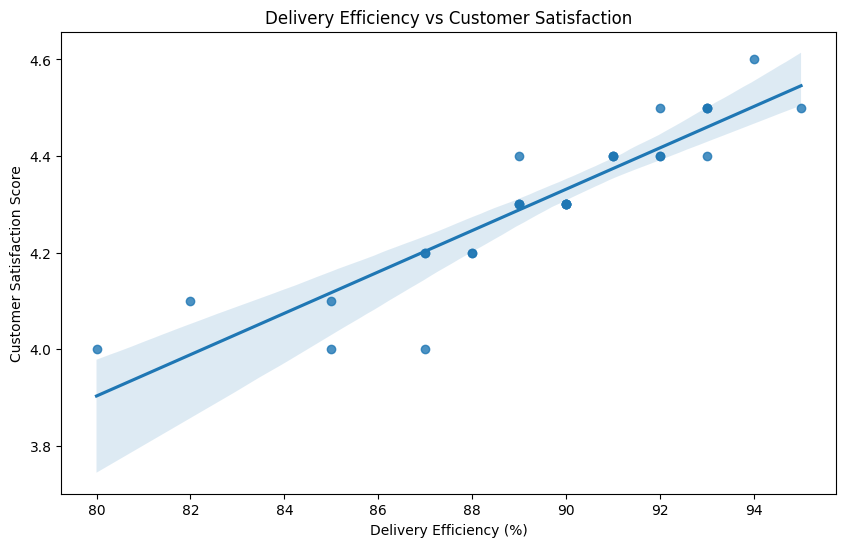

In [31]:
# Delivery Efficiency vs Customer Satisfaction
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Delivery Efficiency (%)',
    y='Customer Satisfaction Score',
    data=data
)
plt.title('Delivery Efficiency vs Customer Satisfaction')
plt.xlabel('Delivery Efficiency (%)')
plt.ylabel('Customer Satisfaction Score')
plt.show()
